# AND Gate Implementation with a McCulloch Pitts Neuron

In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
x = np.array([[0,0],[0,1],[1,0],[1,1]])
print(x)
# x.shape

[[0 0]
 [0 1]
 [1 0]
 [1 1]]


In [31]:
y = np.array([[0],[0],[0],[1]])
print(y)
# y.shape

[[0]
 [0]
 [0]
 [1]]


In [32]:
w = np.random.uniform(size=(2,1))
b = 0

print(w)
print(b)
w.shape

[[0.82094362]
 [0.62826901]]
0


(2, 1)

In [33]:
def v_func(x,w,b):
    return np.dot(x,w)+b

v = v_func(x,w,b)
print(v)
v_func(x,w,b).shape

[[0.        ]
 [0.62826901]
 [0.82094362]
 [1.44921263]]


(4, 1)

[[0.5       ]
 [0.65209686]
 [0.69443661]
 [0.80987723]]


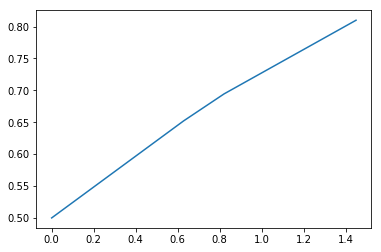

In [34]:
def y_hat_func(a,v):
    return 1/(1+np.exp(-a*v))
y_hat = (y_hat_func(1,v))


print(y_hat)
y_hat.shape
plt.plot(v,y_hat)

In [35]:
def e_func(y,y_hat):
    return -(y-y_hat)/4

e = e_func(y,y_hat)
e.shape

(4, 1)

In [36]:
def fprime_func(a,v):
#     return np.dot(np.transpose(a*y_hat),(1-a*y_hat))
    return y_hat_func(a,v)*(1-y_hat_func(a,v))
fprime = fprime_func(1,v)
fprime.shape

(4, 1)

In [37]:
def delta_func(e,fprime):
    return e*fprime

delta = delta_func(e,fprime)
delta.shape

(4, 1)

In [38]:
def del_w_func(eta,delta,x):
    return x.T.dot(delta*eta)


del_w_func(0.01,delta,x).shape


(2, 1)

In [55]:
epochs = 100000
ee = []

def train(x,y):
    w = np.random.uniform(size=(2,1))
    b = 0
    
    for i in range(epochs):
        v=v_func(x,w,b)
        y_hat = y_hat_func(1,v)
        e = e_func(y,y_hat)
        fprime = fprime_func(1,v)
        delta = delta_func(e,fprime)
        del_w =  del_w_func(0.01,delta,x)
        del_b = 0.01*delta
        w = w - del_w
        b = b - del_b
        ee.append(np.sum(e))
#         plt.plot(i,e.T,'r-',linewidth='3.0')
#         plt.show()
#         plt.pause(0.0001)

train(x,y)


In [56]:
y_hat


array([[0.5       ],
       [0.65209686],
       [0.69443661],
       [0.80987723]])

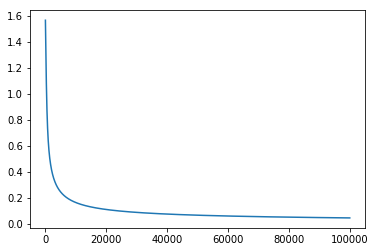

In [57]:
plt.plot([i for i in range(epochs)], ee)